<a href="https://colab.research.google.com/github/jaygo-kr/brunch/blob/master/01_02_music_chart_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 음악차트 데이터 분석 및 시각화


기존에 추출한 네이버뮤직 - 시대별 음악 차트 활용 

[네이버 뮤직 - 시대별 음악 크롤링하기](https://github.com/jaygo-kr/brunch/blob/master/01_01_get_naver_best_music.ipynb)


In [1]:
import os
import numpy as np
import pandas as pd
from google.colab import files, drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
! apt-get install fonts-nanum* # 한글 출력을 위한 글꼴 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [3]:
os.listdir('./gdrive/My Drive/Colab/data/') # 01_01 get_naver_best_music.ipynb 로 생성한 음악차트 위치 확인

['full_data_sep.csv',
 'full_data_era.csv',
 'full_data_genre.csv',
 'full_data_all.csv',
 'merged_data.csv']

In [0]:
music_data = pd.read_csv('./gdrive/My Drive/Colab/data/merged_data.csv')

## 1. 시대별 TOP 10

In [5]:
music_data[music_data['시대']==1980].sort_values(by=['순위/시대'])[['곡명','아티스트','앨범','시대','장르']].head(10).reset_index(drop=True)

,곡명,아티스트,앨범,시대,장르
0,가로수 그늘아래 서면,이문세,5집 가로수 그늘아래서면,1980,발라드
1,사랑하기 때문에,유재하,1집 사랑하기 때문에,1980,발라드
2,너에게로 또 다시,변진섭,2집 너에게로 또다시,1980,발라드
3,가리워진 길,유재하,1집 사랑하기 때문에,1980,발라드
4,비처럼 음악처럼,김현식,3집 비처럼 음악처럼,1980,발라드
5,빗속에서,이문세,3집 난 아직 모르잖아요,1980,록/포크
6,그대 내 품에,유재하,1집 사랑하기 때문에,1980,발라드
7,나 항상 그대를,이선희,4집 사랑이 지는 이자리,1980,발라드
8,내 마음에 비친 내 모습,유재하,1집 사랑하기 때문에,1980,발라드
9,그 아픔까지 사랑한거야,조정현,1집 그 아픔까지 사랑한거야,1980,발라드


In [6]:
music_data[music_data['시대']==1990].sort_values(by=['순위/시대'])[['곡명','아티스트','앨범','시대','장르']].head(10).reset_index(drop=True)

,곡명,아티스트,앨범,시대,장르
0,잘못된 만남,김건모,3집 잘못된 만남,1990,댄스
1,커플,젝스키스,3.5집 Special Album,1990,발라드
2,애상,쿨(COOL),4집 애상,1990,댄스
3,여전히 아름다운지,김연우,4집 A Night In Seoul,1990,발라드
4,아름다운 이별,김건모,3집 잘못된 만남,1990,발라드
5,회상 (December),터보,3집 Born Again,1990,발라드
6,기억의 습작,전람회,1집 Exhibition,1990,발라드
7,I'm Your Girl,S.E.S.,1집 S.E.S,1990,댄스
8,Love Is... (3+3=0),터보(Turbo),2집 New Sensation,1990,댄스
9,그녀와의 이별,김현정,1집 Legend,1990,댄스


In [7]:
music_data[music_data['시대']==2000].sort_values(by=['순위/시대'])[['곡명','아티스트','앨범','시대','장르']].head(10).reset_index(drop=True)

,곡명,아티스트,앨범,시대,장르
0,소주 한 잔,임창정,10집 Bye,2000,발라드
1,눈의 꽃,박효신,미안하다 사랑한다 OST (KBS 미니시리즈),2000,발라드
2,벌써 일년,브라운 아이즈,1집 Brown Eyes,2000,발라드
3,어떻게 사랑이 그래요,이승환,9집 Hwantastic,2000,발라드
4,거리에서,성시경,5집 The Ballads,2000,발라드
5,우산 (Feat. 윤하),에픽하이 (EPIK HIGH),"5집 Pieces, Part One",2000,힙합
6,친구라도 될걸 그랬어,거미,1집 Like Them,2000,발라드
7,두 사람,성시경,4집 다시 꿈꾸고 싶다,2000,발라드
8,다시 사랑한다 말할까,김동률,3집 귀향 (歸鄕),2000,발라드
9,만약에,태연 (TAEYEON),쾌도홍길동 OST (KBS 드라마),2000,발라드


In [8]:
music_data[music_data['시대']==2010].sort_values(by=['순위/시대'])[['곡명','아티스트','앨범','시대','장르']].head(10).reset_index(drop=True)

,곡명,아티스트,앨범,시대,장르
0,그대네요 (With 아이유),성시경,그대네요,2010,발라드
1,좋은 날,아이유(IU),Real,2010,댄스
2,미리 메리 크리스마스 (Feat. 천둥 of MBLAQ),아이유(IU),Real,2010,댄스
3,끝사랑,김범수,7집 SOLISTA Part 2,2010,발라드
4,너는 나의 봄이다,성시경,시크릿 가든 OST Part 4,2010,발라드
5,너 때문에 미쳐,티아라(T-ara),Breaking Heart,2010,댄스
6,그 사람,이승철,제빵왕 김탁구 OST Part 3,2010,발라드
7,나만 몰랐던 이야기,아이유(IU),Real +,2010,발라드
8,Run Devil Run,소녀시대 (GIRLS` GENERATION),'Run Devil Run' The 2nd Album Repackage,2010,댄스
9,미워요,정인,정인 From Andromeda,2010,발라드


In [9]:
music_data.shape

(17575, 9)

In [0]:
# 루프에 활용할 변수 설정
ERA = music_data['시대'].unique()
GENRE = music_data['장르'].unique()

## 2. 아티스트 다양성



*   차트에 존재하는 아티스트의 수



In [11]:
len(music_data['아티스트'].unique())

2339

* 시대별 아티스트의 다양성

In [0]:
era_static = pd.DataFrame(columns=['ERA','music_num','artist_num'])
for era in ERA:
  music_num = len(music_data[music_data['시대']==era])
  artist_num = len(music_data[music_data['시대']==era]['아티스트'].unique())
  era_static = era_static.append({'ERA':era, 'music_num':music_num ,'artist_num':artist_num}, ignore_index=True)
era_static['ratio'] = era_static['artist_num']/era_static['music_num'] # for문에 포함하면 전체 값이 float이 되어서 별도 수행

In [13]:
era_static

,ERA,music_num,artist_num,ratio
0,1980,3094,337,0.10892
1,1990,4486,702,0.156487
2,2000,4996,1096,0.219376
3,2010,4999,1115,0.223045


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()

Text(0, 0.5, '다양성')

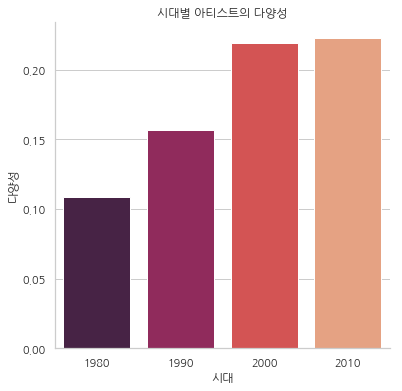

In [15]:
sns.set(style="whitegrid",font="nanumgothic")
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("pastel")
sns.despine()
sns.barplot(x="ERA", y="ratio", data=era_static, palette="rocket")
ax.set_title("시대별 아티스트의 다양성")
plt.xlabel('시대')
plt.ylabel('다양성')

## 3. 아티스트 순위(곡 수 기준)

* 시대별 아티스트 순위

In [0]:
artist_rank_era = pd.DataFrame()

for era in ERA:
  artist_rank_era = pd.concat([artist_rank_era, music_data[music_data['시대']==era]['아티스트'].value_counts()[:10].reset_index()], axis=1)
  
artist_rank_era.columns = ['아티스트(1980)','곡 수','아티스트(1990)','곡 수','아티스트(2000)','곡 수','아티스트(2010)','곡 수']

In [17]:
artist_rank_era

,아티스트(1980),곡 수,아티스트(1990),곡 수,아티스트(2000),곡 수,아티스트(2010),곡 수
0,조용필,146,김건모,73,에픽하이 (EPIK HIGH),96,나훈아,92
1,김연자,115,서태지와 아이들,69,장윤정,81,소녀시대 (GIRLS` GENERATION),61
2,나훈아,106,듀스,67,BIGBANG,75,남진,44
3,이문세,66,DJ DOC,64,다이나믹 듀오(Dynamic Duo),72,도끼(DOK2),41
4,김현식,64,조용필,59,리쌍(LeeSSang),65,강진,37
5,김수희,62,업타운(UpTown),55,Various Artists,57,유지나,33
6,이미자,62,Various Artists,53,MC몽,54,자우림,31
7,이선희,53,이문세,52,심수봉,48,포맨,31
8,송창식,50,쿨(COOL),52,나훈아,48,2PM,31
9,들국화,49,박강성,50,이미자,46,티아라(T-ara),31


* 전체 기준 아티스트 순위

In [18]:
artist_rank = music_data['아티스트'].value_counts()[:10].reset_index()
artist_rank.columns=['아티스트','곡 수']
artist_rank

,아티스트,곡 수
0,나훈아,282
1,조용필,219
2,이미자,150
3,심수봉,127
4,이문세,125
5,김연자,123
6,Various Artists,121
7,에픽하이 (EPIK HIGH),106
8,이승철,103
9,부활,102


* 순위권 아티스트의 시대별 곡 분포

In [0]:
artist_rank_data = pd.DataFrame()
for artist in artist_rank['아티스트']:
  artist_rank_data = pd.concat([artist_rank_data, music_data[music_data['아티스트']==artist]])

Text(0, 0.5, '곡 수')

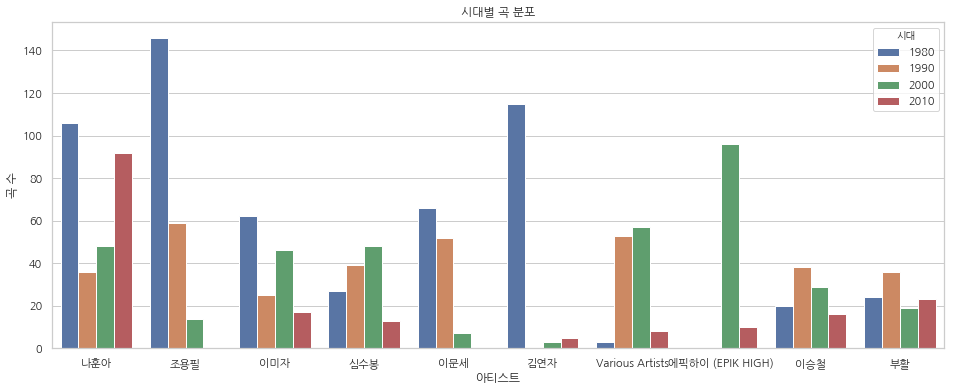

In [20]:
sns.set(style="whitegrid",font="nanumgothic")
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x="아티스트",hue="시대",data=artist_rank_data)
ax.set_title("시대별 곡 분포")
plt.ylabel('곡 수')

## 4. 시대별 선호 장르

In [0]:
music_data['시대'] = music_data['시대'].astype('category') # stripplot y축을 카테고리로 제시하기 위하여 변환

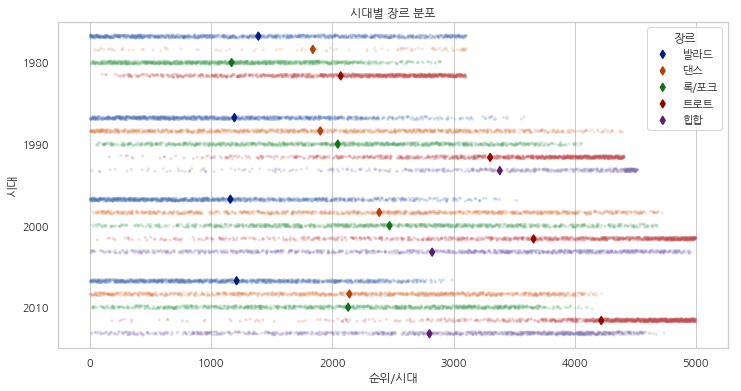

In [22]:
sns.set(style="whitegrid", font="nanumgothic")
f, ax = plt.subplots(figsize=(12, 6))

sns.stripplot(x="순위/시대", y="시대", hue="장르",
              data=music_data, dodge=True, jitter=True,
              size=3, alpha=.2, zorder=1)


sns.pointplot(x="순위/시대", y="시대", hue="장르",
              data=music_data, dodge=.65, join=False, palette="dark",
              markers="d", scale=.8, ci=None)


ax.set_title("시대별 장르 분포")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[5:], labels[5:], title="장르")

## 5. 곡 제목 분석

In [23]:
pip install konlpy

In [0]:
from konlpy.tag import Komoran, Twitter, Hannanum

In [25]:
Komoran = Komoran()
Twitter = Twitter()
Hannanum = Hannanum()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:
music_string = music_data['곡명'].to_string(index=False)

In [0]:
# KoNLPy의 Tagger가 여러 버젼이 있음으로 비교
music_noun_ko = Komoran.nouns(music_string)
music_noun_tw = Twitter.nouns(music_string)
music_noun_han = Hannanum.nouns(music_string)

In [0]:
music_noun_ko = pd.Series(music_noun_ko)
music_noun_tw = pd.Series(music_noun_tw)
music_noun_han = pd.Series(music_noun_han)

In [29]:
music_noun_compare = pd.DataFrame()
music_noun_compare = pd.concat([music_noun_compare, music_noun_ko.value_counts()[:10].reset_index()], axis=1)
music_noun_compare = pd.concat([music_noun_compare, music_noun_tw.value_counts()[:10].reset_index()], axis=1)
music_noun_compare = pd.concat([music_noun_compare, music_noun_han.value_counts()[:10].reset_index()], axis=1)
music_noun_compare.columns = ['Komoran','count','Twitter','count','Hannanum','count']
music_noun_compare

,Komoran,count,Twitter,count,Hannanum,count
0,사랑,910,사랑,1344,사랑,1030
1,사람,211,그대,350,나,484
2,이별,173,너,349,너,362
3,말,152,나,326,그대,354
4,여자,141,내,280,내,233
5,눈물,140,사람,224,이별,168
6,날,130,이별,192,당신,167
7,밤,129,여자,180,여자,158
8,노래,129,그,179,사람,152
9,남자,127,당신,171,눈물,142


In [30]:
# Tagger들의 결론이 다양함으로 이를 합하여 좀 더 안정적인 결과물을 얻자
music_noun_mix = pd.concat([music_noun_ko,music_noun_tw,music_noun_han])
music_noun_mix_rank = music_noun_mix.value_counts()[:10].reset_index()
music_noun_mix_rank.columns = ['Tagger Mix','count']
music_noun_mix_rank['count'] = music_noun_mix_rank['count']//3
music_noun_mix_rank

,Tagger Mix,count
0,사랑,1094
1,나,271
2,너,237
3,그대,234
4,사람,195
5,내,193
6,이별,177
7,여자,159
8,눈물,149
9,말,149


In [0]:
music_noun_era= pd.DataFrame()
for era in ERA:
  music_string = music_data[music_data['시대']==era]['곡명'].to_string(index=False)
  music_noun_mix_era = pd.concat([pd.Series(Komoran.nouns(music_string)), pd.Series(Twitter.nouns(music_string)), pd.Series(Hannanum.nouns(music_string))]).reset_index(drop=True)
  music_noun_mix_era = pd.concat([music_noun_mix_era, pd.Series([era]*music_noun_mix_era.shape[0])], axis=1)
  music_noun_era = pd.concat([music_noun_era, music_noun_mix_era])
music_noun_era.columns=['단어','시대']

In [0]:
music_noun_rank_data = pd.DataFrame()
for noun in music_noun_mix_rank['Tagger Mix']:
  music_noun_rank_data = pd.concat([music_noun_rank_data, music_noun_era[music_noun_era['단어']==noun]])

Text(0, 0.5, '곡 수(X3)')

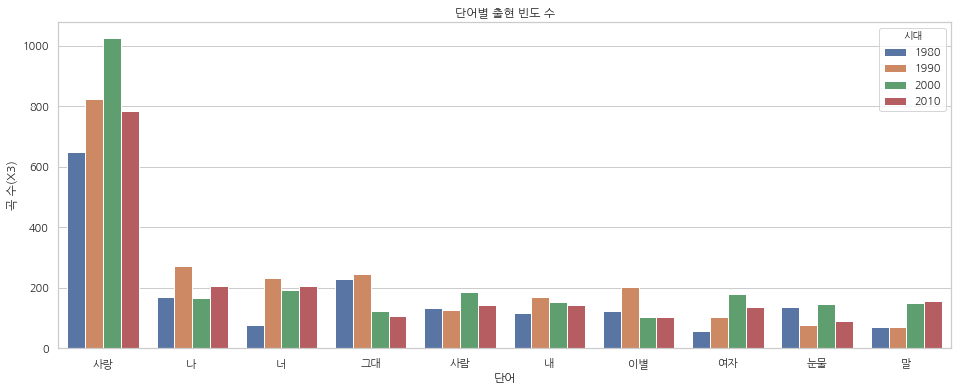

In [33]:
sns.set(style="whitegrid",font="nanumgothic")
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x="단어",hue="시대",data=music_noun_rank_data)
ax.set_title("단어별 출현 빈도 수")
plt.ylabel('곡 수(X3)')